In [1]:
%cd /content/drive/MyDrive/Neper_Models

/content/drive/MyDrive/Neper_Models


In [2]:
!sudo apt-get update
!sudo apt-get install libgsl-dev
!sudo apt-get install  povray


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [3,296 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,557 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 5,241 kB in 1s (5,148 kB/s)
Reading package lists... Done
W: Skipping 

In [2]:
# !git clone https://github.com/neperfepx/neper.git
# %cd /content/drive/MyDrive/Neper_Models/neper/src
# %mkdir /content/drive/MyDrive/Neper_Models/neper/src/build
# %pwd
# %cd build
# # prompt:   GSL required, please specify it's location.

# !cmake ..
# !make
# !make install

# %mkdir /content/drive/MyDrive/Neper_Models/neper/results


fatal: destination path 'neper' already exists and is not an empty directory.


In [3]:
%cd /content/drive/MyDrive/Neper_Models/neper/results/


/content/drive/MyDrive/Neper_Models/neper/results


In [4]:
!export OMP_NUM_THREADS=8
!chmod +x /content/drive/MyDrive/Neper_Models/neper/src/build/neper
!/content/drive/MyDrive/Neper_Models/neper/src/build/neper -T -n 100 -dim 2 -id 2
!/content/drive/MyDrive/Neper_Models/neper/src/build/neper -V n100-id2.tess -print img1


========================    N   e   p   e   r    =======================
Info   : A software package for polycrystal generation and meshing.
Info   : Version 4.10.2-11
Info   : Built with: gsl|muparser|opengjk|openmp|nlopt|libscotch (full)
Info   : Running on 2 threads.
Info   : <https://neper.info>
Info   : Copyright (C) 2003-2024, and GNU GPL'd, by Romain Quey.
Info   : No initialization file found (`/root/.neperrc').
Info   : ---------------------------------------------------------------
Info   : MODULE  -T loaded with arguments:
Info   : [ini file] (none)
Info   : [com line] -n 100 -dim 2 -id 2
Info   : ---------------------------------------------------------------
Info   : Reading input data...
Info   : Creating domain...
Info   : Creating tessellation...
Info   :   - Setting seeds... 
Info   :   - Running tessellation...
Info   : Generating crystal orientations...
Info   : Writing results...
Info   :     [o] Writing file `n100-id2.tess'...
Info   :     [o] Wrote file `n100-id2

In [5]:
!pwd

/content/drive/MyDrive/Neper_Models/neper/results


In [8]:
from sklearn.mixture import GaussianMixture
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from matplotlib import ticker

import os
class ImageConverter:
    def __init__(self, output_folder,filename=''):
        self.output_folder = output_folder
        if not os.path.exists(self.output_folder):
            os.makedirs(self.output_folder)
        self.show_images = True
        self.filename = filename

    def convert_to_grayscale(self, img_orig, img_orig_black):
        """
        Convert the cropped image and black pixels image to grayscale.

        Parameters
        ----------
        img_orig : numpy array
            The original image cropped to non-white pixels.
        img_orig_black : numpy array
            The original image with black pixels only.
        filename : str
            The filename to use when saving the images.

        Returns
        -------
        img_cropped_gray : numpy array
            The cropped image in grayscale.
        img_black_pixels_gray : numpy array
            The black pixels only image in grayscale.
        """
        img_cropped_gray = cv2.cvtColor(img_orig, cv2.COLOR_BGR2GRAY)
        img_black_pixels_gray = cv2.cvtColor(img_orig_black, cv2.COLOR_BGR2GRAY)

        # Save the grayscale images
        cv2.imwrite(os.path.join(self.output_folder, f"{self.filename}_cropped_gray.png"), img_cropped_gray)
        cv2.imwrite(os.path.join(self.output_folder, f"{self.filename}_black_pixels_gray.png"), img_black_pixels_gray)

        # Visualize the grayscale images
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(img_cropped_gray, cmap='gray')
        plt.title('Cropped Image (Grayscale)')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(img_black_pixels_gray, cmap='gray')
        plt.title('Black Pixels Only (Grayscale)')
        plt.axis('off')
        plt.savefig(os.path.join(self.output_folder, f"{self.filename}_grayscale_comparison.png"))
        if self.show_images:
            plt.show()
        else :
            plt.close()
        return img_cropped_gray, img_black_pixels_gray

    def image_filtering(self,img_orig):
        # Find pixels that are black or white
        # prompt: Filter pure white and black pixels in img_orig, then visualize them side by side (original and filtered where black are red and white are green) and then find a bounding box of non-white pixels -- to remove the white spaces around the image. Have the black pixel as separate image
        """
        Process an image to filter and visualize black and white pixels, and crop the image.

        This function identifies pure black and white pixels in the input image.
        It visualizes the original and filtered images side by side, where black
        pixels are marked in red and white pixels in green. It also computes a
        bounding box around non-white pixels to crop the image and remove white
        spaces. Additionally, it extracts black pixels into a separate image.

        Parameters:
        img_orig : np.ndarray
            The original image represented as a NumPy array.

        Returns:
        None
        """
        black_pixels = np.all(img_orig == [0, 0, 0], axis=-1)
        white_pixels = np.all(img_orig == [255, 255, 255], axis=-1)

        # Create a new image with black pixels as red and white pixels as green
        img_filtered = img_orig.copy()
        img_filtered[black_pixels] = [0, 0, 255]  # Red color
        img_filtered[white_pixels] = [0, 255, 0]  # Green color

        # Visualize original and filtered images side by side
        plt.figure(1,figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(img_filtered, cv2.COLOR_BGR2RGB))
        plt.title('Filtered Image (Black as Red, White as Green)')
        plt.axis('off')
        plt.savefig(os.path.join(self.output_folder, f"{self.filename}_image_Filtering_Part1.png"))
        if self.show_images:
            plt.show()
        else :
            plt.close()

        # Find the bounding box of non-white pixels
        non_white_mask = ~white_pixels
        coords = np.argwhere(non_white_mask)
        x_min, y_min = coords.min(axis=0)
        x_max, y_max = coords.max(axis=0)

        # Crop the image to the bounding box
        img_cropped = img_orig[x_min+4:x_max-3, y_min+4:y_max-3]

        # Create a separate image for black pixels
        black_pixels = np.all(img_cropped == [0, 0, 0], axis=-1)
        img_black_pixels = np.zeros_like(img_cropped) + 255
        img_black_pixels[black_pixels] = img_cropped[black_pixels]

        # Visualize the cropped image and the black pixels image
        plt.figure(2,figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(img_cropped, cv2.COLOR_BGR2RGB))
        plt.title('Image Cropped to Non-White Pixels')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(img_black_pixels, cv2.COLOR_BGR2RGB))
        plt.title('Black Pixels Only')
        plt.axis('off')
        plt.savefig(os.path.join(self.output_folder, f"{self.filename}_image_Filtering_Part2.png"))
        if self.show_images:
            plt.show()
        else :
            plt.close()
        return img_cropped,img_black_pixels

    def ru_gaussian_mixture(self,img_cropped_gray,max_components=20,plot_intensity=True):
        """
        Determine the optimal number of components for a Gaussian Mixture Model (GMM)
        using Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC).

        Parameters:
        img_cropped_gray : np.ndarray
            The cropped grayscale image.
        max_components : int, optional
            The maximum number of components to consider for the GMM. Default is 20.
        plot_intensity : bool, optional
            Whether to plot the intensity histogram of the input image. Default is True.

        Returns:
        tuple
            A tuple of two integers, the first being the optimal number of components
            based on BIC and the second being the optimal number of components based on AIC.
        """
        intensity_values = img_cropped_gray.flatten().reshape(-1, 1)
        if plot_intensity:
            plt.figure()
            plt.hist(intensity_values, bins=256, density=True, alpha=1, color='r', label='Histogram');
            plt.savefig(os.path.join(self.output_folder, f"{self.filename}_image_Intensity_Histogram.png"))
            if self.show_images:
                plt.show()
            else :
                plt.close()
        # Determine the optimal number of components for GMM using AIC and BIC
        aic = []
        bic = []
        reg_covar = 0.5
        components_range = range(1, max_components + 1)
        for n in components_range:
            gmm = GaussianMixture(n_components=n, random_state=1,covariance_type='diag',init_params="k-means++",reg_covar=reg_covar,n_init=5)
            gmm.fit(intensity_values)
            aic.append(gmm.aic(intensity_values))
            bic.append(gmm.bic(intensity_values))
            print('Number of components:',n)
        # Plot AIC and BIC to visually determine the optimal number of components
        plt.figure(figsize=(10, 5))
        plt.plot(components_range, aic, label='AIC')
        plt.plot(components_range, bic, label='BIC')
        plt.xlabel('Number of components')
        plt.ylabel('Criterion Value')
        plt.title('AIC and BIC for GMM')
        plt.legend()
        plt.grid(True)
        plt.savefig(os.path.join(self.output_folder, f"{self.filename}_image_AIC_BIC.png"))
        if self.show_images:
            plt.show()
        else :
            plt.close()
        print('optimal number of components:',components_range[np.argmin(bic)])
        print('optimal number of components:',components_range[np.argmin(aic)])
        return components_range[np.argmin(bic)],components_range[np.argmin(aic)]

    def gmm_optimal_func(self,img_cropped_gray,comp=8):
        """
        Fit a Gaussian Mixture Model (GMM) to the grayscale intensity values
        of a cropped image and visualize the results.

        This function takes a grayscale image as input, flattens the intensity
        values, and fits a GMM with a specified number of components. It then
        plots the histogram of the original intensity values along with the
        probability density function (PDF) of the fitted GMM components.

        Parameters
        ----------
        img_cropped_gray : np.ndarray
            A 2D array representing the cropped grayscale image.

        Returns
        -------
        gmm_optimal

        Visualization
        -------------
        Displays a plot showing the histogram of the intensity values and the
        GMM PDF overlaid.

        Notes
        -----
        The number of components in the GMM is currently set to 20, which may
        need adjustment based on the characteristics of the input image.
        """
        intensity_values = img_cropped_gray.flatten().reshape(-1, 1)
        # Fit the GMM with the optimal number of components
        gmm_optimal = GaussianMixture(n_components=comp, random_state=1,covariance_type='diag',reg_covar=0.1,n_init=3,
                                    init_params="k-means++")
        gmm_optimal.fit(intensity_values)
        # Create a figure with subplots
        fig, axes = plt.subplots(1, 1, figsize=(10,10))

        # Plot 1: Histogram of original intensity values and GMM components
        axes.hist(intensity_values, bins=256, density=True, alpha=0.6, color='g', label='Histogram')
        x = np.linspace(0, 255, 1000).reshape(-1, 1)
        logprob = gmm_optimal.score_samples(x)
        pdf = np.exp(logprob)
        axes.plot(x, pdf, '-r', label='GMM PDF')
        plt.savefig(os.path.join(self.output_folder, f"{self.filename}_image_GMM_Fit.png"))
        if self.show_images:
            plt.show()
        else :
            plt.close()
        return gmm_optimal

    def generate_binned_grayscale(self,img_cropped_gray,gmm_optimal,optimal_n_components=8):
        # Get the mean of each component, which represents the intensity modes
        """
        Generate an adaptive binned grayscale image using Gaussian Mixture Model (GMM) components.

        This function takes a grayscale image and applies adaptive binning based on
        the intensity modes determined by a fitted GMM. It assigns new grayscale
        values to each bin and plots the resulting adaptive grayscale image alongside
        the original grayscale image for comparison.

        Parameters
        ----------
        img_cropped_gray : np.ndarray
            A 2D array representing the cropped grayscale image.
        gmm_optimal : GaussianMixture
            A fitted Gaussian Mixture Model object used to determine intensity modes.
        optimal_n_components : int, optional
            The number of components in the GMM, which determines the number of bins.
            Default is 8.
        save_plot : bool, optional
            Whether to save the plot of the adaptive grayscale image. Default is False.

        Returns
        -------
        img_adaptive_gray : np.ndarray
            A 2D array of the adaptive binned grayscale image.
        grayscale_levels : np.ndarray
            An array of the grayscale levels used for binning.

        Visualization
        -------------
        Displays a plot with two subplots: the adaptive grayscale image with a discretized
        colorbar and the original grayscale image for reference. Optionally saves the plot
        if `save_plot` is True.
        """
        means = sorted(gmm_optimal.means_.flatten())
        # Create an empty array for the adaptive grayscale image
        img_adaptive_gray = np.zeros_like(img_cropped_gray)
        # Define the grayscale values for the levels based on the number of components
        grayscale_levels = np.linspace(0, 255, optimal_n_components)
        # Define bins based on the midpoints between means
        bin_edges = [0] + [(means[i] + means[i+1]) / 2 for i in range(optimal_n_components - 1)] + [256]
        for i in range(optimal_n_components):
            lower_bound = bin_edges[i]
            upper_bound = bin_edges[i+1]
            mask = (img_cropped_gray >= lower_bound) & (img_cropped_gray < upper_bound)
            # Assign a grayscale value corresponding to the bin index
            img_adaptive_gray[mask] = int(grayscale_levels[i])

        # Handle values exactly at the upper edge of the last bin (256 is exclusive)
        mask = (img_cropped_gray == 255)
        img_adaptive_gray[mask] = 255 # Assign the highest grayscale value

        # --- Plotting the results ---
        # Create a figure with subplots
        fig, axes = plt.subplots(1, 2, figsize=(18, 6))

        # Plot 2: Adaptive Grayscale Image with discretized colorbar and ticks at bin locations
        im = axes[0].imshow(img_adaptive_gray, cmap='gray', vmin=0, vmax=255)
        axes[0].set_title('Adaptive Grayscale Image')
        axes[0].axis('off') # Hide axes

        # Add a colorbar to the second subplot
        cbar = fig.colorbar(im, ax=axes[0], orientation='vertical', fraction=0.046, pad=0.04)
        cbar.set_label('Grayscale Intensity')

        # Discretize the colorbar and add ticks at the location of the grayscale levels used for binning
        cbar.set_ticks(grayscale_levels)
        cbar.set_ticklabels([str(int(t)) for t in grayscale_levels])
        cbar.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

        #Plot 3: Original Grayscale Image (optional, for comparison)
        im2 = axes[1].imshow(img_cropped_gray, cmap='gray')
        axes[1].set_title('Original Grayscale Image')
        axes[1].axis('off')
        # Add a colorbar to the second subplot
        cbar = fig.colorbar(im2, ax=axes[1], orientation='vertical', fraction=0.046, pad=0.04)
        cbar.set_label('Grayscale Intensity')

        plt.savefig(os.path.join(self.output_folder, f"{self.filename}_image_Filtered_Grayscale_Binned.png"))
        if self.show_images:
            plt.show()
        else :
            plt.close()

        return img_adaptive_gray,grayscale_levels

    def run_base_case(self,img_orig,max_components=20):
        img_cropped,img_black_pixels = self.image_filtering(img_orig)
        img_cropped_gray,img_black_pixels_gray = self.convert_to_grayscale(img_cropped,img_black_pixels)
        n_comp_bic,n_comp_aic=self.ru_gaussian_mixture(img_cropped_gray,max_components=max_components,plot_intensity=True)
        gmm_optimal = self.gmm_optimal_func(img_cropped_gray,comp=n_comp_bic)
        img_adaptive_gray,grayscale_levels = self.generate_binned_grayscale(img_cropped_gray,gmm_optimal,optimal_n_components=n_comp_bic)
        self.img_cropped = img_cropped
        self.img_cropped_gray = img_cropped_gray
        self.img_black_pixels_gray = img_black_pixels_gray
        self.img_adaptive_gray   = img_adaptive_gray
        self.grayscale_levels = grayscale_levels
        print('Done the analysis')

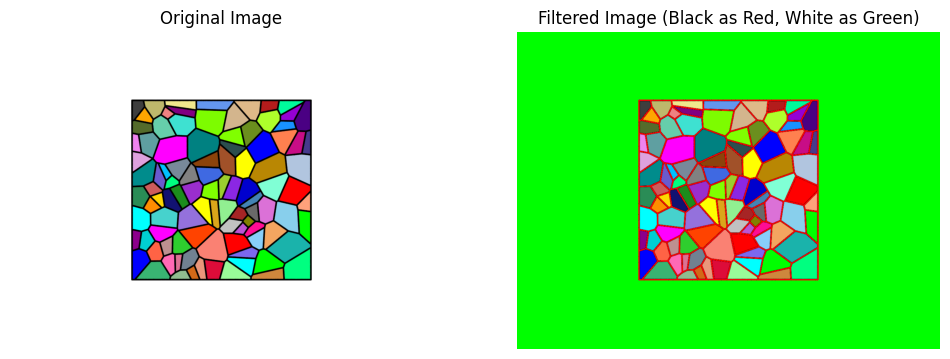

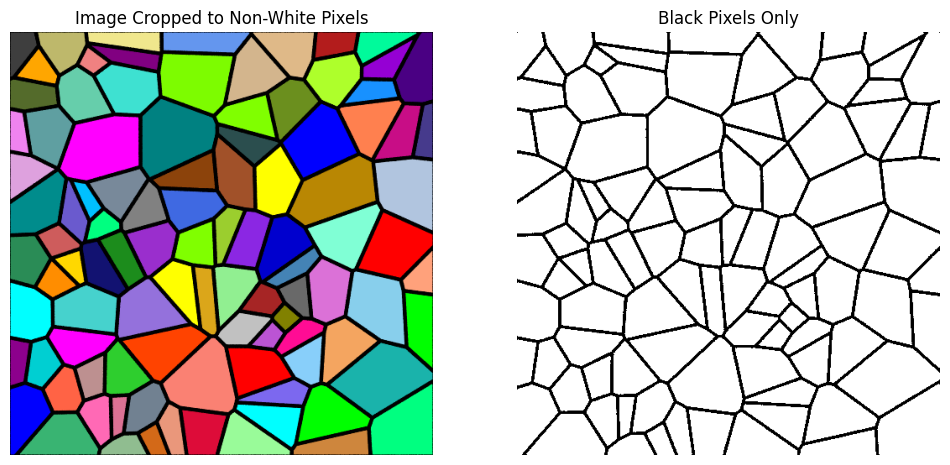

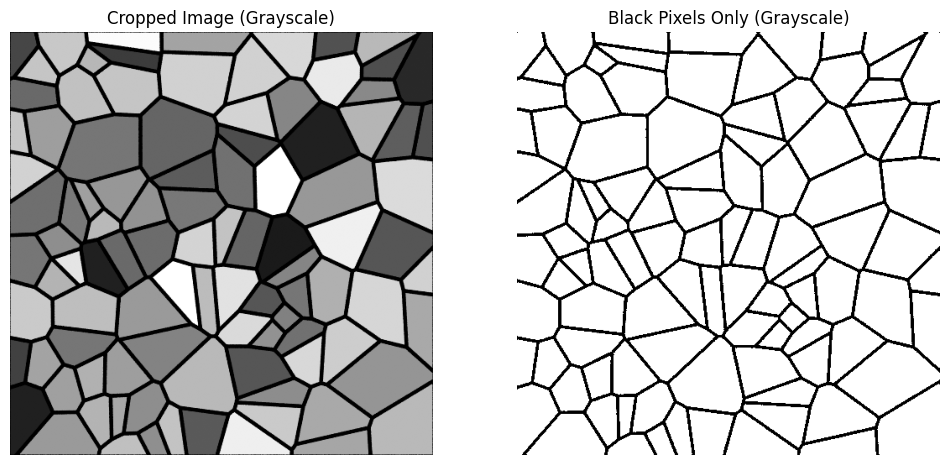

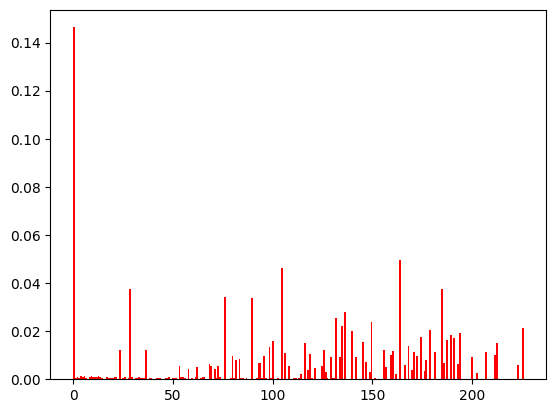

Number of components: 1
Number of components: 2
Number of components: 3
Number of components: 4
Number of components: 5
Number of components: 6
Number of components: 7
Number of components: 8
Number of components: 9
Number of components: 10
Number of components: 11
Number of components: 12
Number of components: 13
Number of components: 14
Number of components: 15
Number of components: 16
Number of components: 17
Number of components: 18
Number of components: 19
Number of components: 20


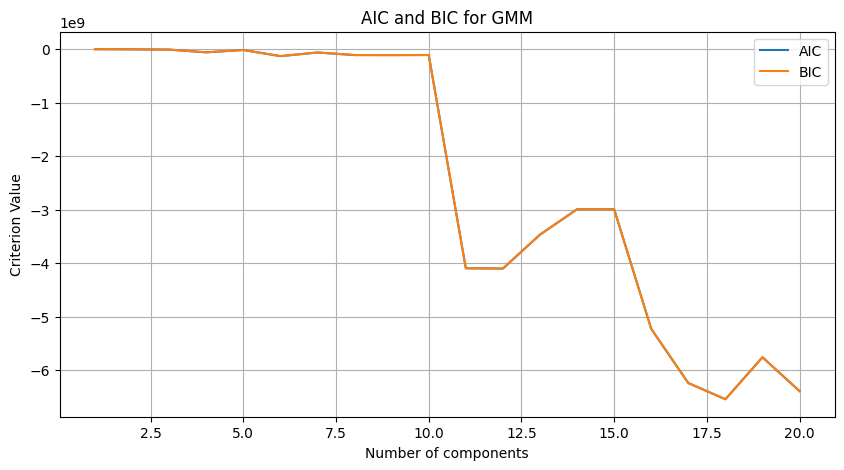

optimal number of components: 18
optimal number of components: 18


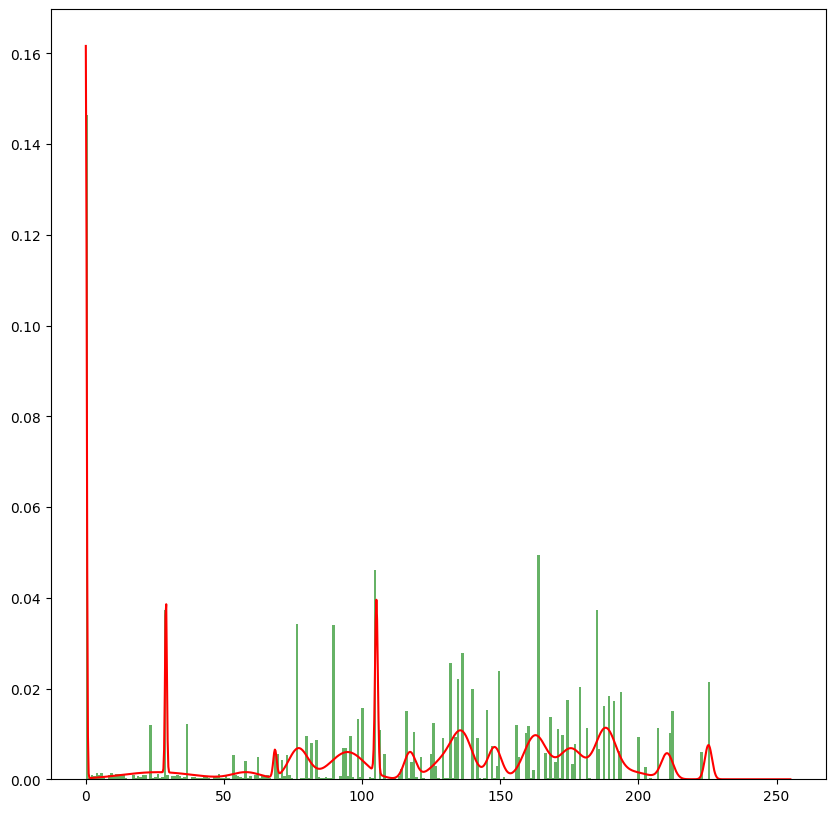

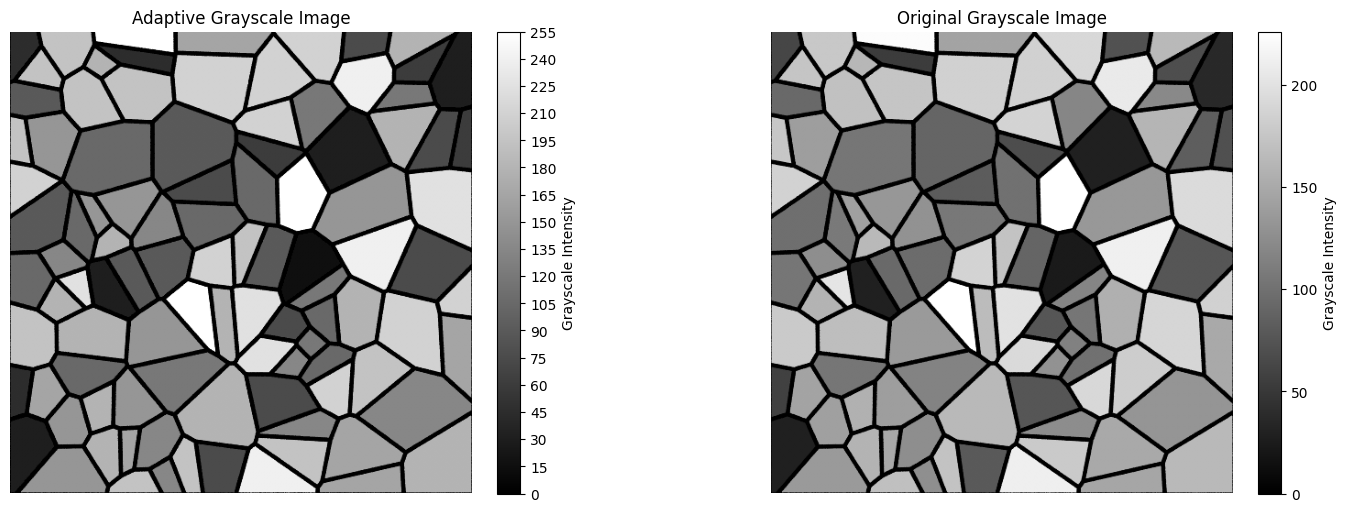

Done the analysis


In [9]:
test_case = ImageConverter('results_T1',filename='img1')
# Load the image
img_orig = cv2.imread('img1.png')
test_case.run_base_case(img_orig)

In [ ]:
!/content/drive/MyDrive/Neper_Models/neper/src/build/neper -T -n 100 -morpho gg -group "id<=50?1:2"


In [30]:
!neper -T -n 100 -id 2
!neper -V n100-id2.tess -print img1b


========================    N   e   p   e   r    =======================
Info   : A software package for polycrystal generation and meshing.
Info   : Version 4.10.2-11
Info   : Built with: gsl|muparser|opengjk|openmp|nlopt|libscotch (full)
Info   : Running on 2 threads.
Info   : <https://neper.info>
Info   : Copyright (C) 2003-2024, and GNU GPL'd, by Romain Quey.
Info   : No initialization file found (`/root/.neperrc').
Info   : ---------------------------------------------------------------
Info   : MODULE  -T loaded with arguments:
Info   : [ini file] (none)
Info   : [com line] -n 100 -id 2
Info   : ---------------------------------------------------------------
Info   : Reading input data...
Info   : Creating domain...
Info   : Creating tessellation...
Info   :   - Setting seeds... 
Info   :   - Running tessellation...
Info   : Generating crystal orientations...
Info   : Writing results...
Info   :     [o] Writing file `n100-id2.tess'...
Info   :     [o] Wrote file `n100-id2.tess'.

In [31]:
!neper -T -n 300 -id 3 -dim 2
!neper -V n300-id3.tess -print img_2d


========================    N   e   p   e   r    =======================
Info   : A software package for polycrystal generation and meshing.
Info   : Version 4.10.2-11
Info   : Built with: gsl|muparser|opengjk|openmp|nlopt|libscotch (full)
Info   : Running on 2 threads.
Info   : <https://neper.info>
Info   : Copyright (C) 2003-2024, and GNU GPL'd, by Romain Quey.
Info   : No initialization file found (`/root/.neperrc').
Info   : ---------------------------------------------------------------
Info   : MODULE  -T loaded with arguments:
Info   : [ini file] (none)
Info   : [com line] -n 300 -id 3 -dim 2
Info   : ---------------------------------------------------------------
Info   : Reading input data...
Info   : Creating domain...
Info   : Creating tessellation...
Info   :   - Setting seeds... 
Info   :   - Running tessellation...
Info   : Generating crystal orientations...
Info   : Writing results...
Info   :     [o] Writing file `n300-id3.tess'...
Info   :     [o] Wrote file `n300-id3

In [33]:
!neper -T -n 300 -morpho gg -dim 2

Output hidden; open in https://colab.research.google.com to view.

In [34]:
!neper -V n300-id1.tess -print img1_2D_GG


========================    N   e   p   e   r    =======================
Info   : A software package for polycrystal generation and meshing.
Info   : Version 4.10.2-11
Info   : Built with: gsl|muparser|opengjk|openmp|nlopt|libscotch (full)
Info   : Running on 2 threads.
Info   : <https://neper.info>
Info   : Copyright (C) 2003-2024, and GNU GPL'd, by Romain Quey.
Info   : No initialization file found (`/root/.neperrc').
Info   : ---------------------------------------------------------------
Info   : MODULE  -V loaded with arguments:
Info   : [ini file] (none)
Info   : [com line] n300-id1.tess -print img1_2D_GG
Info   : ---------------------------------------------------------------
Info   :   - Reading arguments...
Info   : Loading tessellation...
Info   :     [i] Parsing file `n300-id1.tess'...
Info   :     [i] Parsed file `n300-id1.tess'.
Info   : Printing image...
Info   :   - Printing tessellation...
Info   :   - Generating png file (1200x900 pixels)...
Info   :     [o] Writing f